In [2]:
# Data source:
# http://awgmain.morningstar.com/webhelp/Practice/Plans/Correlation_Matrix_of_the_14_Asset_Classes.htm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load CSV file
data = np.genfromtxt('correlation_matrix.csv', delimiter=',', dtype=np.float64, names=True)
# Get asset class names and correlation values
names = data.dtype.names
count = len(names)
corr = data.view((np.float64, len(data.dtype.names)))
# Show data
print(names)
corr

('US_Lg_Cap_Growth', 'US_Lg_Cap_Value', 'US_Mid_Cap_Growth', 'US_Mid_Cap_Growth_1', 'US_Sm_Cap_Growth', 'US_Sm_Cap_Val', 'Foreign_Industrialzed_Mkts_Stocks', 'Emerging_Mkts_Stks', 'US_Investment_Grade_Bonds', 'US_High_Yield_Bonds', 'NonUS_Bonds', 'Cash', 'Commodities', 'Real_Estate')


array([[ 1.   ,  0.848,  0.896,  0.74 ,  0.856,  0.718,  0.582,  0.517,
         0.189,  0.528,  0.005,  0.023,  0.124,  0.444],
       [ 0.848,  1.   ,  0.778,  0.899,  0.743,  0.844,  0.586,  0.537,
         0.23 ,  0.577, -0.008,  0.052,  0.141,  0.588],
       [ 0.896,  0.778,  1.   ,  0.776,  0.98 ,  0.792,  0.558,  0.559,
         0.125,  0.562, -0.019, -0.019,  0.162,  0.515],
       [ 0.74 ,  0.899,  0.776,  1.   ,  0.767,  0.957,  0.536,  0.512,
         0.212,  0.62 , -0.015, -0.002,  0.15 ,  0.678],
       [ 0.856,  0.743,  0.98 ,  0.767,  1.   ,  0.805,  0.539,  0.56 ,
         0.097,  0.581, -0.036, -0.035,  0.161,  0.541],
       [ 0.718,  0.844,  0.792,  0.957,  0.805,  1.   ,  0.516,  0.517,
         0.16 ,  0.644, -0.032, -0.013,  0.157,  0.701],
       [ 0.582,  0.586,  0.558,  0.536,  0.539,  0.516,  1.   ,  0.667,
         0.17 ,  0.398,  0.288,  0.052,  0.181,  0.389],
       [ 0.517,  0.537,  0.559,  0.512,  0.56 ,  0.517,  0.667,  1.   ,
         0.036,  0.432,  

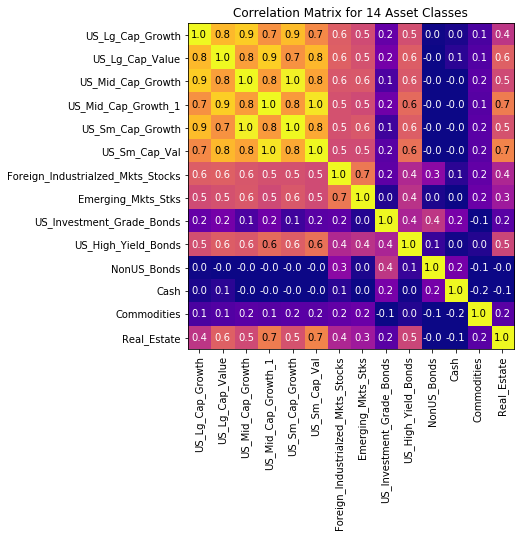

In [6]:
# Plot data as heatmap
plt.figure().set_size_inches(6, 6)
plt.imshow(corr, cmap='plasma', interpolation='nearest', aspect ='equal', vmax=1, vmin=0)

# Show the asset class names
plt.xticks(range(count), names, rotation='vertical')
plt.yticks(range(count), names)
plt.title('Correlation Matrix for 14 Asset Classes')

# Show correlation values as text labels
for x in range(count):
    for y in range(count):
        value = corr[x, y]
        color = 'black' if value > 0.6 else 'white'
        value = '%01.1f' % value
        plt.text(x, y, value, color=color, ha='center', va='center')

plt.show()

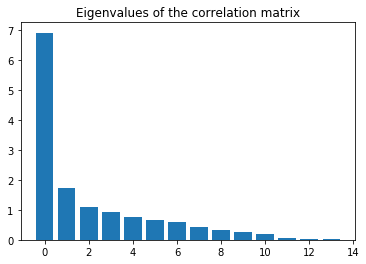

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(corr)
eigenvalues[::-1].sort()
plt.bar(range(count), eigenvalues)
plt.title('Eigenvalues of the correlation matrix')